<b>Implement a classifier that takes as input raw images from the camera and is able to classify the
following three classes:<br>
• Bicycles:    0 <br>
• Pedestrians: 1<br>
• Noise:       2 </b>

<h1>Report</h1>

The data set consists of 30,000 images equally labelled for three classes in which it needs to be classified.<br>

A 4 layer fully connected neural network classifier is built using Keras to classify the images into classes.
10% of data is taken as test data and it is kept in mind that all classes have equal amount of in data when this division is made thus using <b>stratify</b> parameter while performing the split.<br>

The model uses the following metrics:

<b>Loss Metric: categorical_crossentropy</b> as a loss metric to measure the performance of classification model whose output is a in the range of probability values of 0 and 1.<br>

<b>Optimizer: Adam</b>

<b>Metric: Accuracy</b> 

The resultant model has the accuracy of 90.43%.

<b>Evaluation Metrics of the Model:</b>

Recall, Precision and F1 Score where examined together with confusion matrix to proceed furthur it is clear that Recall of class 1 i.e pedestrian has to be 1.

<H2>Prioritizing One Class</H2>

In order to fit into a situation of never missing out a pedestrian, a <b>custom loss function</b> was used for loss metric to penalize miscalsification of the pedestrian class.

The custom fuction gives higher weight to the class in question and thus reduces misclassification error to almost zero.

This however also takes a toll on accuracy and misclassification of other classes increases, however for demonstration purposes this code snippet justifies how this can be done.

It is also clear that the class weights require tuning before a the final values can be concluded.

In [1]:
import numpy as np
import tensorflow as tf
import random as rn

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/fchollet/keras/issues/2280#issuecomment-306959926

import os
os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(32)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

from functools import partial
from itertools import product

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Load dataset
dataset = np.load('dataset.npy').item()

# Some info on the dataset
dataset_size = len(dataset['x'])
feature_vector_dimen = len(dataset['x'][1, :])
no_classes = len(set(dataset['y']))
print("Dataset size: %d" % dataset_size)
print("Feature−vector dimension: %d" % feature_vector_dimen)
print("Number of classes: %d" % no_classes)

Dataset size: 30000
Feature−vector dimension: 54
Number of classes: 3


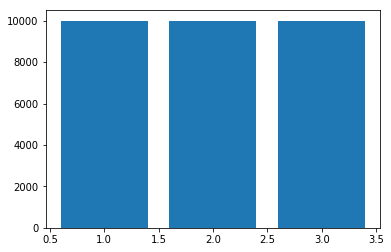

In [4]:
unique, counts = np.unique(dataset['y'], return_counts=True)
plt.bar(unique, counts)
plt.show()

All the classes have equal amount of data.

In [5]:
# Transform name species into one hot vector encoding
encoder = LabelEncoder()
encoder.fit(dataset['y'])
Y = encoder.transform(dataset['y'])
Y = np_utils.to_categorical(Y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset['x'], Y, test_size=0.1, random_state=123, stratify=Y)

In [7]:
def build_model(loss_metric):
    
    model = Sequential()
    model.add(Dense(8, input_dim = feature_vector_dimen , activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))


    model.compile(loss = loss_metric, optimizer = 'adam' , metrics = ['accuracy'])

    # Train model (use 10% of training set as validation set)
    history = model.fit(X_train, y_train, validation_split=0.1, epochs = 15, batch_size=16)

    scores = model.evaluate(X_test, y_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    
    y_p = model.predict(X_test)
    print(confusion_matrix(y_test.argmax(axis=1), y_p.argmax(axis=1)))
    
    print(classification_report(y_test.argmax(axis=1), y_p.argmax(axis=1)))

In [8]:
build_model('categorical_crossentropy')

Train on 24300 samples, validate on 2700 samples
Epoch 1/15
24300/24300 [==============================] - 2s 99us/step - loss: 1.2570 - acc: 0.7524 - val_loss: 0.5105 - val_acc: 0.7785
Epoch 2/15
24300/24300 [==============================] - 2s 84us/step - loss: 0.4237 - acc: 0.8229 - val_loss: 0.3793 - val_acc: 0.8378
Epoch 3/15
24300/24300 [==============================] - 2s 83us/step - loss: 0.3413 - acc: 0.8535 - val_loss: 0.3152 - val_acc: 0.8596
Epoch 4/15
24300/24300 [==============================] - 2s 95us/step - loss: 0.3027 - acc: 0.8672 - val_loss: 0.3345 - val_acc: 0.8422
Epoch 5/15
24300/24300 [==============================] - 2s 83us/step - loss: 0.2865 - acc: 0.8759 - val_loss: 0.2763 - val_acc: 0.8793
Epoch 6/15
24300/24300 [==============================] - 2s 82us/step - loss: 0.2814 - acc: 0.8795 - val_loss: 0.2646 - val_acc: 0.8852
Epoch 7/15
24300/24300 [==============================] - 2s 83us/step - loss: 0.2669 - acc: 0.8876 - val_loss: 0.2653 - val_acc:

<b>Custom Loss Function<b>

In [16]:
# Custom loss function with costs

# def w_categorical_crossentropy(y_true, y_pred, weights):
#     nb_cl = weights.shape[1]
#     final_mask = K.zeros_like(y_pred[:, 0])
#     y_pred_max = K.max(y_pred, axis=1)
#     y_pred_max = K.reshape(y_pred_max, (K.shape(y_pred)[0], 1))
#     y_pred_max_mat = K.cast(K.equal(y_pred, y_pred_max), K.floatx())
#     for c_p, c_t in product(range(nb_cl), range(nb_cl)):
#         final_mask += (weights[c_t, c_p] * y_pred_max_mat[:, c_p] * y_true[:, c_t])
#     return K.categorical_crossentropy(y_true,y_pred) * final_mask

def w_categorical_crossentropy(weights):
    """
    A weighted version of keras.objectives.categorical_crossentropy
    
    Variables:
        weights: numpy array of shape (C,) where C is the number of classes
    
    Usage:
        weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
        loss = weighted_categorical_crossentropy(weights)
        model.compile(loss=loss,optimizer='adam')
    """
    
    weights = K.variable(weights)
        
    def loss(y_true, y_pred):
        # scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        # clip to prevent NaN's and Inf's
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        # calc
        loss = y_true * y_pred * weights
        loss = -K.sum(loss, -1)
        return loss
    
    return loss

In [29]:
ncce = w_categorical_crossentropy(weights=[4.0,14.0,1.0])

In [30]:
build_model(ncce)

Train on 24300 samples, validate on 2700 samples
Epoch 1/15
24300/24300 [==============================] - 4s 185us/step - loss: -4.7691 - acc: 0.5334 - val_loss: -4.8894 - val_acc: 0.5130
Epoch 2/15
24300/24300 [==============================] - 3s 132us/step - loss: -4.7900 - acc: 0.5162 - val_loss: -4.9148 - val_acc: 0.5285
Epoch 3/15
24300/24300 [==============================] - 3s 109us/step - loss: -4.8117 - acc: 0.5520 - val_loss: -4.9151 - val_acc: 0.5385
Epoch 4/15
24300/24300 [==============================] - 3s 106us/step - loss: -4.8048 - acc: 0.5397 - val_loss: -4.9296 - val_acc: 0.5433
Epoch 5/15
24300/24300 [==============================] - 3s 109us/step - loss: -4.8080 - acc: 0.5980 - val_loss: -4.9192 - val_acc: 0.5715
Epoch 6/15
24300/24300 [==============================] - 3s 108us/step - loss: -4.8073 - acc: 0.5917 - val_loss: -4.8948 - val_acc: 0.6104
Epoch 7/15
24300/24300 [==============================] - 3s 121us/step - loss: -4.7597 - acc: 0.6118 - val_los

c:\users\amodwal\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
